# Sentiment Analysis of Alexandre Dumas' *The Count of Monte Cristo*
### We will be using Python to analyse, specifically, the connection between the love and redemption that Dantés goes through to the characters of Haydée and Mercédes.

First step is open every volume and store each line into variables with the same name as their file name for easier categorization

In [20]:
with open ('comte-1.txt') as f:
    lines = f.readlines()

In [21]:
comte_text1 = ''

for line in lines:
    comte_text1 += line

In [22]:
with open ('comte-2.txt') as f:
    lines = f.readlines()

In [23]:
comte_text2 = ''

for line in lines:
    comte_text2 += line

In [24]:
with open ('comte-3.txt') as f:
    lines = f.readlines()

In [25]:
comte_text3 = ''

for line in lines:
    comte_text3 += line

In [26]:
with open ('comte-4.txt') as f:
    lines = f.readlines()

In [27]:
comte_text4 = ''

for line in lines:
    comte_text4 += line

Next step is to import all libraries that will be needed for this process. 

SpaCy
: a NLP (natural language processing) library that will be able to read, categorize and tokenize every word in this text with the help of the French language pipeline called 'fr_core_news_sm'. (https://realpython.com/natural-language-processing-spacy-python/)

Matplotlib 
: a library that will help create visualizations, like graphs, in Python. (https://matplotlib.org/)

Re or Regular Expressions Module
: a built-in Python library that is made to recognize, search, match, split, replace, or work with patterns in this text. (https://docs.python.org/3/library/re.html)

In [48]:
import spacy
nlp = spacy.load('fr_core_news_sm')

import matplotlib.pyplot as plt

import re

With all libraries imported into this environment, the first step is defining a function that will look into every volume and separate each volume's chapter by using the Roman numerals as a signal to make the split.

In [49]:
def split_into_chapters(text):
    pattern = r"\n{2,}([IVXLCDM]+)\n+\s*(.*?)\n"
    
    matches = re.split(pattern, text)
 
    # Once the variables are defined, then we make a dictionary that will store the chapters.
    chapters = {}
    for i in range(1, len(matches), 3):
        chapter_num = matches[i]
        chapter_title = matches[i + 1]
        chapter_content = matches[i + 2].strip()
        chapters[f"{chapter_num}"] = chapter_content
 
    return chapters

Now we are taking every volume and splitting into chapters.

chapter_1 belongs to the chapters in volume 1 and every volume to their chapters accordingly.

In [31]:
chapters_1 = split_into_chapters(comte_text1)
chapters_2 = split_into_chapters(comte_text2)
chapters_3 = split_into_chapters(comte_text3)
chapters_4 = split_into_chapters(comte_text4)

The all_chaps variable is helping get rid of any duplicates in the chapter numbers.

In [32]:
all_chapts = {k: v for d in [chapters_1, chapters_2, chapters_3, chapters_4] for k, v in d.items()}

Now, we are defining a function that will tokenize the text through the use of spaCy (with the nlp variable) and then it will calculate every time a specified entity is named.

In [34]:
def calculate_freqs(chapters, target_ent):
    freqs = {}
    for number, chapter in chapters.items():
        doc = nlp(chapter)
        freqs[number] = 0
        for ent in doc.ents:
            if ent.text == target_ent:
                #print(ent.text)
                freqs[number] += 1
    return freqs

Since entities can sometimes be wrong or use the wrong tag, we are using the EntityRuler to make sure that spaCy is marking Dantés, Haydée and Mercédes as characters since they're the focus of our analysis.

In [50]:
from spacy.pipeline import EntityRuler

ruler = nlp.add_pipe("entity_ruler", before = "ner")

patterns = [{"label": "PER", "pattern" : "Dantès"}, {"label": "PER", "pattern" : "Haydée"}, {"label": "PER", "pattern" : "Mercédès"}]

ruler.add_patterns(patterns)

Now, we are telling Python to use the calculate_freqs function while looking for the 'Mercédes' named entity first and store those numbers in the Mfreqs variable belonging to each volume.

In [35]:
Mfreqs_1 = calculate_freqs(chapters_1, 'Mercédès')
Mfreqs_2 = calculate_freqs(chapters_2, 'Mercédès')
Mfreqs_3 = calculate_freqs(chapters_3, 'Mercédès')
Mfreqs_4 = calculate_freqs(chapters_4, 'Mercédès')

After, we repeat the process while looking for the 'Haydée' named entity and storing those numbers in the Hfreqs.

In [36]:
Hfreqs_1 = calculate_freqs(chapters_1, 'Haydée')
Hfreqs_2 = calculate_freqs(chapters_2, 'Haydée')
Hfreqs_3 = calculate_freqs(chapters_3, 'Haydée')
Hfreqs_4 = calculate_freqs(chapters_4, 'Haydée')

The next step is storing all those frequencies in dictionaries named all_Mfreqs and all_Hfreqs accordingly.

In [37]:
all_Mfreqs = {**Mfreqs_1, **Mfreqs_2, **Mfreqs_3, **Mfreqs_4}
all_Hfreqs = {**Hfreqs_1, **Hfreqs_2, **Hfreqs_3, **Hfreqs_4}

Now, we import textblob which will help with the sentiment analysis portion of this process.

textblob
: a built-in Python library that helps with processing textual data. In this case, it will help to determine whether words are positive, negative or neutral.

textblob_fr is made specifically for the French language.

Blobber
: a way to reuse textblob objects to make a more efficient use of memory.

In [39]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from nltk.tokenize import sent_tokenize

Now, we are defining that tb (textblob) variable as a part of speech (pos) tagger and a pattern analyzer.

In [40]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

With the textblob, we will look at each chapter within each volume and it will give us the sentiment scores for each tome or volume.

In [41]:
tome_1_sentiment = [tb(chapter).sentiment[0] for chapter in list(chapters_1.values())]
tome_2_sentiment = [tb(chapter).sentiment[0] for chapter in list(chapters_2.values())]
tome_3_sentiment = [tb(chapter).sentiment[0] for chapter in list(chapters_3.values())]
tome_4_sentiment = [tb(chapter).sentiment[0] for chapter in list(chapters_4.values())]

Now we take all the sentiment scores from each volume or tome and store them into the all_sentiments variable.

In [42]:
all_sentiments = tome_1_sentiment + tome_2_sentiment + tome_3_sentiment + tome_4_sentiment

In [43]:
all_sentiments = [tb(chapter).sentiment[0] for chapter in list(all_chapts.values())]

Since now we have all scores, then we will plot them into a graph. The data variable is storing the amount of times Haydée is mentioned and the data2 variable is the number of times Mercédes is mentioned. 

In [1]:
data = all_Hfreqs
keys = list(data.keys())
values = list(data.values())

data2 = all_Mfreqs 
keys2 = list(data2.keys())
values2 = list(data2.values())

# With matplotlib is what we use to make a graphchart.
plt.figure(figsize=(25, 6))  # These numbers let us manipulate the size of the graph for all chapters to fit.
plt.bar(keys, values, color='blue', label='Haydée')  # These variables allow us to choose different colors for Haydée and Mercédes.
plt.bar(keys2, values2, color='green', label='Mercédès', alpha=0.7)

# These are the list of x and y labels for the graph.
plt.xlabel('Roman Numerals')
plt.ylabel('Frequency')
plt.title('Frequency of Roman Numerals')

# This is the variable that allow us to rotate the labels for the chapter numbers.
plt.xticks(rotation=90)

# These variables allow us to make the sentiment scores fit into the chart since the numbers are not using the same scale.
# Remember that sentiment scores use a -1 (negative) to 0 (neutral) to 1 (positive).
min_sentiment = -0.02
max_sentiment = 0.17
min_bar = 0
max_bar = 40

# Function to normalize sentiment scores so that they're consistent with the range of mentions.
def normalize_sentiment(score, min_sentiment, max_sentiment, min_bar, max_bar):
    return (score - min_sentiment) / (max_sentiment - min_sentiment) * (max_bar - min_bar) + min_bar

normalized_sentiment = [normalize_sentiment(score, min_sentiment, max_sentiment, min_bar, max_bar) for score in all_sentiments]



plt.plot(range(len(normalized_sentiment)), normalized_sentiment, marker='o', color='red', linestyle='-', linewidth=2, markersize=8, label='Sentiment')

plt.legend()

# Show the plot
plt.tight_layout() 
plt.show()

NameError: name 'all_Hfreqs' is not defined

For the final view of this analysis, we will combine the graphs of both sentiment and mentions of the characters to be able to have a more complete understanding of the flow of the text and the emotions within it.

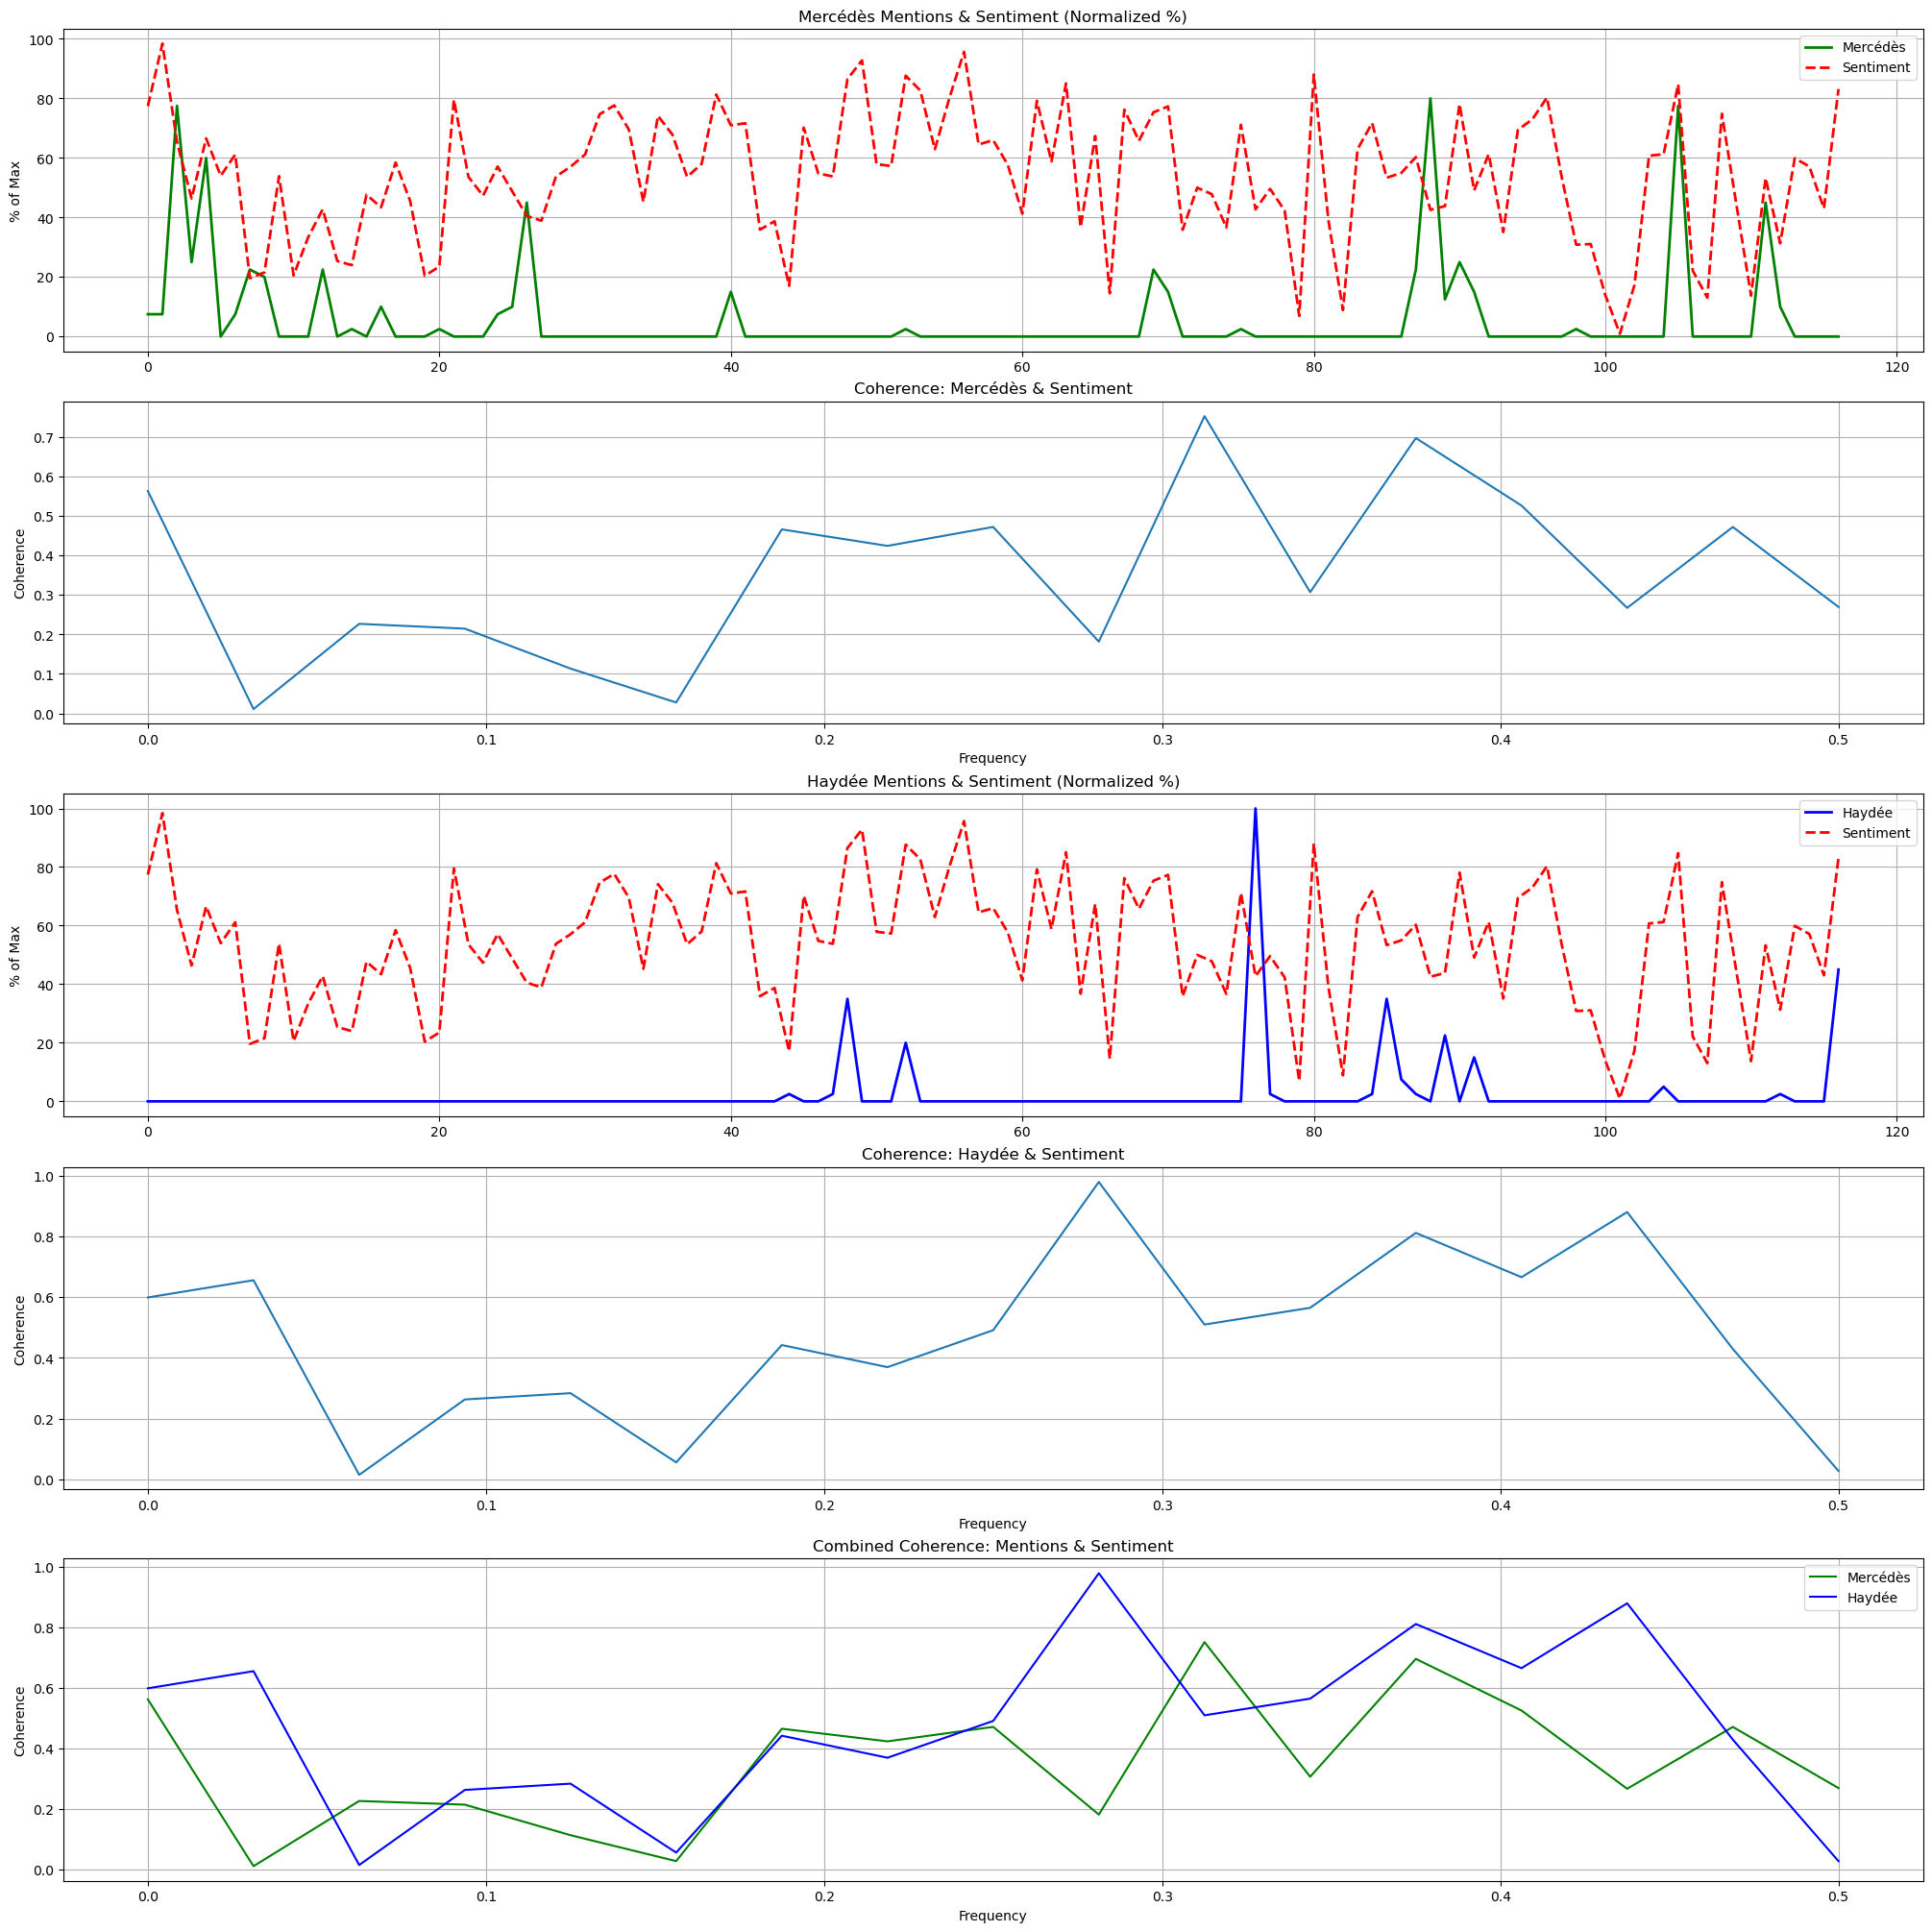

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# --- Normalize frequency values to percent of max ---
def to_percent(values, max_val):
    return [v / max_val * 100 for v in values]

# Convert frequencies and sentiments to percentages
max_freq = 40  # Assumed max frequency
values_percent = to_percent(values, max_freq)
values2_percent = to_percent(values2, max_freq)

# Normalize sentiment scores (as percent of their range)
min_sentiment = -0.02
max_sentiment = 0.17
sentiment_range = max_sentiment - min_sentiment
normalized_sentiment = [(s - min_sentiment) / sentiment_range * 100 for s in all_sentiments]

# X-axis values
x = np.arange(len(normalized_sentiment))

# --- Create subplot layout ---
fig, axs = plt.subplots(5, 1, figsize=(20, 20), constrained_layout=True)

# --- Plot 1: Mercédès line + sentiment ---
axs[0].plot(x, values2_percent, label='Mercédès', color='green', linewidth=2)
axs[0].plot(x, normalized_sentiment, label='Sentiment', color='red', linestyle='--', linewidth=2)
axs[0].set_title('Mercédès Mentions & Sentiment (Normalized %)')
axs[0].set_ylabel('% of Max')
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Coherence (Mercédès vs. Sentiment) ---
cxy1, f1 = axs[1].cohere(values2_percent, normalized_sentiment, NFFT=32, Fs=1)
axs[1].set_ylabel('Coherence')
axs[1].set_title('Coherence: Mercédès & Sentiment')
axs[1].grid(True)

# --- Plot 3: Haydée line + sentiment ---
axs[2].plot(x, values_percent, label='Haydée', color='blue', linewidth=2)
axs[2].plot(x, normalized_sentiment, label='Sentiment', color='red', linestyle='--', linewidth=2)
axs[2].set_title('Haydée Mentions & Sentiment (Normalized %)')
axs[2].set_ylabel('% of Max')
axs[2].legend()
axs[2].grid(True)

# --- Plot 4: Coherence (Haydée vs. Sentiment) ---
cxy2, f2 = axs[3].cohere(values_percent, normalized_sentiment, NFFT=32, Fs=1)
axs[3].set_ylabel('Coherence')
axs[3].set_title('Coherence: Haydée & Sentiment')
axs[3].grid(True)

# --- Plot 5: Combined Coherence Plot ---
axs[4].plot(f1, cxy1, label='Mercédès', color='green')
axs[4].plot(f2, cxy2, label='Haydée', color='blue')
axs[4].set_title('Combined Coherence: Mentions & Sentiment')
axs[4].set_xlabel('Frequency')
axs[4].set_ylabel('Coherence')
axs[4].legend()
axs[4].grid(True)

plt.show()